<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_clusters_xlsx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
from sklearn.cluster import KMeans

In [17]:
import torch

In [18]:
import matplotlib.pyplot as plt

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Load the data from the Excel file
data = pd.read_excel('/content/logs_CAD_2024_1.xlsx')

In [21]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [22]:
# Ensure 'timestamp' column exists and convert it to datetime
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
    # Drop rows with invalid timestamps
    data = data.dropna(subset=['timestamp'])
else:
    raise KeyError("The column 'timestamp' is missing from the data.")

<ipython-input-22-c6943739f6c6>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')


In [23]:
# Drop rows with invalid timestamps
data = data.dropna(subset=['timestamp'])

In [24]:
# Extract relevant features from timestamp
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek

In [25]:
# Encode categorical variables
data['lesson'] = data['lesson'].astype('category').cat.codes
data['day_part'] = data['day_part'].astype('category').cat.codes

In [26]:
# Select features for clustering
features = ['user_id', 'tool_id', 'log_count', 'lesson', 'day_part', 'hour', 'day_of_week']
if not all(feature in data.columns for feature in features):
    missing_features = [feature for feature in features if feature not in data.columns]
    raise KeyError(f"The following required features are missing from the data: {', '.join(missing_features)}")

In [27]:
# Drop rows with any NaN values in selected features
data = data.dropna(subset=features)

In [28]:
X = data[features]

In [29]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Convert to PyTorch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

In [31]:
# Determine the number of clusters
n_clusters = 5

In [32]:
# Apply KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)  # Fit on the scaled numpy array, not the tensor

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [33]:
# Get cluster labels
data['cluster'] = kmeans.labels_

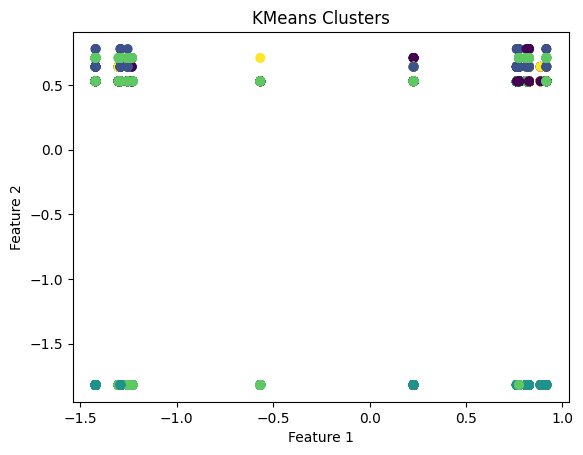

In [34]:
# Plot clusters if you have two main features to visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clusters')
plt.show()

Convert to excel file

In [38]:
# Save the results to a new Excel file locally
output_file = 'clustered_data.xlsx'
data.to_excel(output_file, index=False)
print(f"Clustered data saved to {output_file}")

Clustered data saved to clustered_data.xlsx
